In [3]:
using Plots
using Distributions
using StatsBase
using HypothesisTests

INFO: Recompiling stale cache file /Users/zane/.julia/lib/v0.6/HypothesisTests.ji for module HypothesisTests.


# 假设检验

用来判断样本与总体、样本与样本之间的差异是由于抽样误差还是本质差别造成的统计方法。

## 思想
### 小概率思想
小概率事件在一次试验中基本不会发生，$P < 0.05$

### 反证法思想


### 小概率反证法思想

## 基本步骤
1. 提出假设检验 
    - H0 两总体均数相等
    - H1 两总体均数不等
2. 设定检验水准 $\alpha$, usu. one-tail: 0.025, two-tail: 0.05
3. 选择单双侧检验
4. 选择监测方法，并计算统计量
5. 计算拒绝范围与非拒绝范围

# u检验
总体sigma已知或n足够大

计算u值
$$ u = \frac{\bar{x} - \mu_0}{\sigma_{\bar{x}}} = \frac{\bar{x} - \mu_0}{\dfrac{\sigma}{\sqrt{n}}}$$

计算临界值:

|u|$\alpha$|
|-|--------|
|2.58| 0.01|
|1.96| 0.05|
|1.65| 0.1 |

# t检验
- sigma未知n较小
- 来自正态分布
- 双样本时方差要相近

计算t值
$$ t = \frac{\bar{x} - \mu_0}{S / \sqrt{n}} $$

查询临界值 $t(\nu)$

当n较大时，也可用u检验
当x为未知分布，则采用秩和检验

# 二类错误

|| H0 is true | H1 is true|
|-|------------|-----------|
|reject H0|$\alpha$ (type I) | $1-\beta$ |
|accept H0|$1 - \alpha$|$\beta$ (type II)|


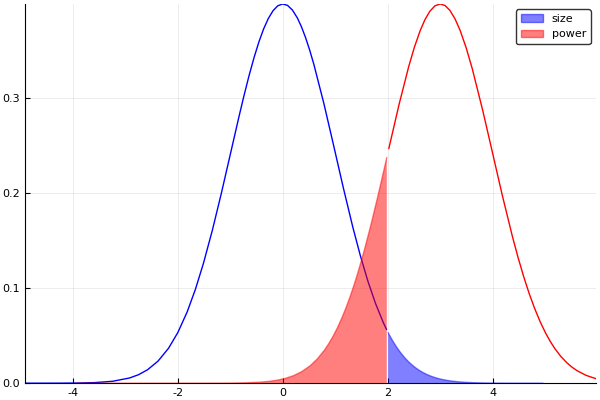

In [40]:
plot()
plot!(x -> pdf(Normal(),x),-5,2,color=:blue, label="")
plot!(x -> pdf(Normal(),x),2,5,fill=(0,:blue),alpha=0.5,color=:blue, label="size")

plot!(x -> pdf(Normal(3,1),x),2,6,color=:red, label="")
plot!(x -> pdf(Normal(3,1),x),-4,2,fill=(0,:red),alpha=0.5, color=:red, label="power")

## 可信区间与假设检验

可信区间为量化指标，亦可用于回答假设检验的问题，同时包含更多的信息。

In [45]:
pvalue_ttest = (nu, t, tail=2) -> (1-cdf(TDist(nu), t))*tail

(::#69) (generic function with 2 methods)

In [48]:
t = (3.42-3.3)/0.4*sqrt(35)

1.7748239349298864

In [50]:
pvalue_ttest(34,t,2)

0.08488133018230215